# **K-Nearest Neighbors (KNN) From Scratch**

K-Nearest Neighbors (KNN) is a simple, non-parametric classification and regression algorithm that predicts the class of a data point based on the majority class of its *k* nearest neighbors. It calculates distances using metrics like Euclidean or Manhattan distance and is widely used in pattern recognition and machine learning due to its simplicity and effectiveness.

In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
def EuclideanDistance (value1, value2):
  return np.sqrt(np.sum((value1 - value2)**2))

In [3]:
# Manhattan Distance Function stated for learning purposes
def ManhattanDistance(value1, value2):
    return np.sum(np.abs(value1 - value2))

In [4]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit_model(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self, x):
    distances = [EuclideanDistance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[: self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]


In [5]:
# Generate synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train KNN classifier
knn = KNN(k=3)
knn.fit_model(X_train, y_train)
y_pred = knn.predict(X_test)

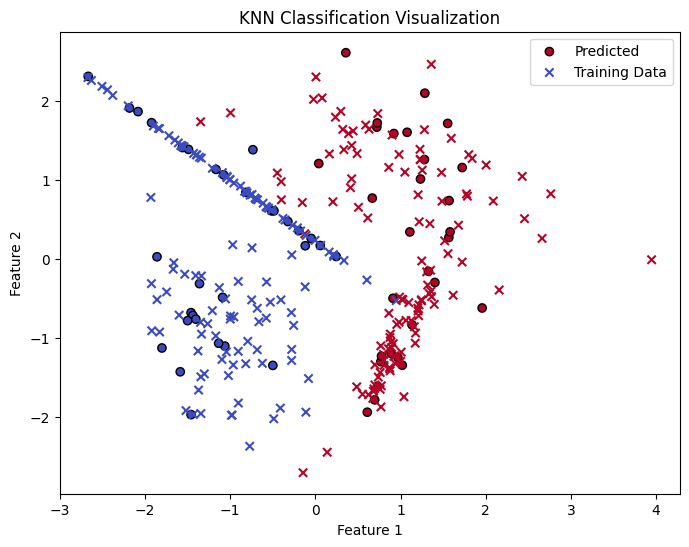

In [7]:
# Visualize Results
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', marker='o', label='Predicted')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='x', label='Training Data')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Classification Visualization")
plt.legend()
plt.show()